In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OrdinalEncoder, StandardScaler, PowerTransformer
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from sklearn.metrics import mean_squared_error

warnings.filterwarnings('ignore')

In [2]:
skin_data = pd.read_csv('Skin Analysis.csv')
# skin_data = pd.read_csv('../b Datasets/Skin Analysis/Skin Analysis.csv')

In [4]:
display(skin_data.head(2))
display(skin_data.tail(2))

,Patient_ID,Skin_treatment,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
0,1,N,10.729641,10.099752,125.903083,457.940042,0.063236,0.023311,0.176994,0.016436,...,17.739020,26.182043,92.652045,642.495423,0.181766,0.267158,0.065338,0.003512,0.277782,0.078103
1,2,N,9.447797,17.314982,92.407802,557.593030,0.109878,0.158177,0.072635,0.002340,...,14.791384,25.337883,78.690352,335.516677,0.140064,0.071308,0.038919,0.084125,0.305742,0.066928


,Patient_ID,Skin_treatment,F1,F2,F3,F4,F5,F6,F7,F8,...,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30
1006,998,Y,19.153341,11.954241,157.615571,1159.048864,0.096222,0.097675,0.044783,0.069661,...,9.981724,25.967223,223.757678,863.020673,0.150676,0.277301,0.137380,0.096757,0.199022,0.102979
1007,999,N,8.062891,11.165952,57.061888,1051.606591,0.097254,0.138637,0.032958,0.004633,...,13.992695,19.511798,123.634956,218.824109,0.119869,0.409323,0.105433,0.022160,0.313774,0.080134


In [5]:
skin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Patient_ID      1008 non-null   int64  
 1   Skin_treatment  1008 non-null   object 
 2   F1              1007 non-null   float64
 3   F2              1007 non-null   float64
 4   F3              1006 non-null   float64
 5   F4              1008 non-null   float64
 6   F5              1006 non-null   float64
 7   F6              1008 non-null   float64
 8   F7              1007 non-null   float64
 9   F8              1007 non-null   float64
 10  F9              1007 non-null   float64
 11  F10             1007 non-null   float64
 12  F11             1003 non-null   float64
 13  F12             1008 non-null   float64
 14  F13             1008 non-null   float64
 15  F14             1008 non-null   float64
 16  F15             1008 non-null   float64
 17  F16             1008 non-null   f

In [6]:
skin_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,1008.0,504.419643,290.992029,1.000000,252.750000,504.500000,756.250000,999.000000
F1,1007.0,12.559906,3.886917,5.753360,9.778168,11.906741,14.673804,34.766907
F2,1007.0,14.570835,4.148864,6.407277,11.453264,14.019957,17.077883,30.856862
F3,1006.0,100.306961,28.998768,38.728787,80.076676,96.948771,113.847418,225.169931
F4,1008.0,752.996970,380.141070,93.157800,501.263509,656.942181,931.436517,3174.048902
F5,1006.0,0.099885,0.020030,0.050752,0.085531,0.099214,0.113390,0.197330
F6,1008.0,0.077377,0.042208,0.000202,0.046498,0.072006,0.102346,0.260403
F7,1007.0,0.050885,0.057187,0.000049,0.013438,0.028263,0.066840,0.403034
F8,1007.0,0.033116,0.035179,0.000019,0.007599,0.018810,0.050331,0.203582
F9,1007.0,0.227398,0.041402,0.109000,0.200184,0.222983,0.245806,0.341423


In [10]:
skin_data.isna().sum() / skin_data.shape[0] * 100

Patient_ID        0.000000
Skin_treatment    0.000000
F1                0.099206
F2                0.099206
F3                0.198413
F4                0.000000
F5                0.198413
F6                0.000000
F7                0.099206
F8                0.099206
F9                0.099206
F10               0.099206
F11               0.496032
F12               0.000000
F13               0.000000
F14               0.000000
F15               0.000000
F16               0.000000
F17               0.000000
F18               0.000000
F19               0.000000
F20               0.000000
F21               0.000000
F22               0.000000
F23               0.000000
F24               0.000000
F25               0.000000
F26               0.000000
F27               0.000000
F28               0.000000
F29               0.000000
F30               0.000000
dtype: float64

In [12]:
skin_data.dropna(inplace=True)

In [14]:
skin_data.select_dtypes('number').skew()

Patient_ID    0.000000
F1            1.124813
F2            0.743363
F3            0.927729
F4            1.504694
F5            0.328429
F6            0.806477
F7            2.055929
F8            1.576375
F9            0.584226
F10           1.184766
F11           2.095499
F12           1.767440
F13           3.116086
F14           2.526397
F15           1.304416
F16           2.122862
F17           4.879519
F18           1.420032
F19           1.977273
F20           1.831264
F21           0.997335
F22           0.390046
F23           0.858271
F24           1.929026
F25           0.155167
F26           1.495243
F27           1.270076
F28           0.805514
F29           0.806720
F30           1.238361
dtype: float64

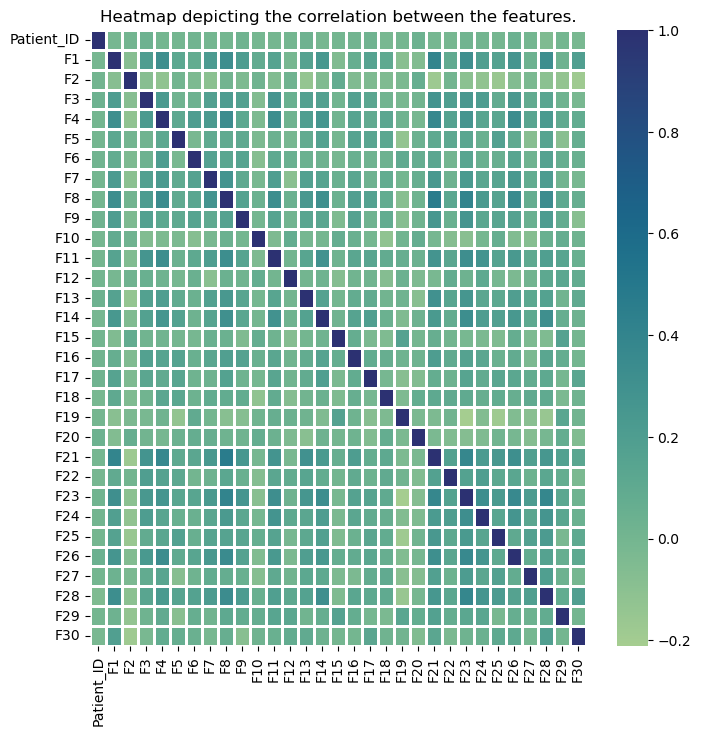

In [17]:
plt.figure(figsize=(8, 8))
sns.heatmap(skin_data.select_dtypes('number').corr(), cmap='crest', linewidths=0.8)
plt.title("Heatmap depicting the correlation between the features.")
plt.show()